## Manifest and Metadata Creation

In [21]:
import pandas as pd 
import numpy as np

Import of the final sample dataset obtained in the EDA notebook: 

In [24]:
data = pd.read_csv('data_eda/data_final_groups.csv')
data.head(5)

,Unnamed: 0,sample_name,acid_reflux,acne_medication,acne_medication_otc,add_adhd,age_cat,age_corrected,age_years,alcohol_consumption,...,weight_units,whole_eggs,whole_grain_frequency,group,sample_names_x,biosample_ids_x,run_ids_x,sample_names_y,biosample_ids_y,run_ids_y
0,0,10317.000023,No,No,No,No,60s,69.0,69.0,Yes,...,kilograms,Regularly (3-5 times/week),Regularly (3-5 times/week),Treatment,10317.000023,7353729,ERR2032495,10317.000023,7353729,ERR2032495
1,1,10317.000028,No,No,No,No,40s,46.0,46.0,Yes,...,kilograms,Occasionally (1-2 times/week),Rarely (less than once/week),Treatment,10317.000028,7353735,ERR2032501,10317.000028,7353735,ERR2032501
2,2,10317.000033,No,No,No,No,60s,60.0,60.0,Yes,...,kilograms,Occasionally (1-2 times/week),Regularly (3-5 times/week),Treatment,10317.000033,8577201,ERR2313963,10317.000033,8577201,ERR2313963
3,3,10317.000038,No,No,No,No,40s,48.0,48.0,Yes,...,kilograms,Rarely (less than once/week),Occasionally (1-2 times/week),Treatment,10317.000038,8614208,ERR2318007,10317.000038,8614208,ERR2318007
4,4,10317.000041,No,No,No,No,20s,25.0,25.0,No,...,kilograms,Regularly (3-5 times/week),Regularly (3-5 times/week),Treatment,10317.000041,8728556,ERR2404913,10317.000041,8728556,ERR2404913


In [25]:
data.specialized_diet_exclude_refined_sugars.value_counts()

Yes    100
No     100
Name: specialized_diet_exclude_refined_sugars, dtype: int64

Lets now create the manifest file needed to create the qiime artifacts

In [57]:
manifest = data.sample_names_y.to_frame()

In [58]:
manifest = manifest.rename(columns={'sample_names_y': 'sample-id'})

In [66]:
# Costruiamo e teniamo solo le colonne che ci servono
manifest['absolute-filepath'] = '/home/LABORATORI/gr887277/gut-microbiota-diet/data_eda/good_quality_20/'+ data['run_ids_y']+'.fastq'
manifest['direction'] = 'forward'


# Scriviamo il csv
manifest.to_csv('fastq_manifest.csv', sep=',', index=False)
manifest

,sample-id,absolute-filepath,direction
0,10317.000023,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward
1,10317.000028,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward
2,10317.000033,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward
3,10317.000038,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward
4,10317.000041,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward
...,...,...,...
195,10317.000052,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward
196,10317.000052,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward
197,10317.000053,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward
198,10317.000059,/home/LABORATORI/gr887277/gut-microbiota-diet/...,forward


## Metadata file creation

In [67]:
metadata = data.sample_names_y.to_frame()

In [68]:
metadata = metadata.rename(columns={'sample_names_y': 'sample-id'})

data[['sample_name', 'sex', 'age_cat', 'specialized_diet_exclude_refined_sugars']]

In [69]:
# Aggiungiamo al manifest le informazioni riguardo l'età, il sesso e l'uso degli antibiotici
metadata['sex'] = data['sex']
metadata['age_cat'] = data['age_cat']
metadata['refined_sugars'] = data['specialized_diet_exclude_refined_sugars']
metadata

,sample-id,sex,age_cat,refined_sugars
0,10317.000023,female,60s,Yes
1,10317.000028,male,40s,Yes
2,10317.000033,female,60s,Yes
3,10317.000038,female,40s,Yes
4,10317.000041,female,20s,Yes
...,...,...,...,...
195,10317.000052,male,20s,No
196,10317.000052,female,20s,No
197,10317.000053,male,20s,No
198,10317.000059,female,20s,No


In [70]:
metadata.refined_sugars.value_counts()

Yes    100
No     100
Name: refined_sugars, dtype: int64

In [71]:
metadata.to_csv('sample_metadata.tsv', sep='\t', index=False)

In [1]:
%conda update conda
%conda install wget

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::nbclassic==0.5.2=py39h06a4308_0
  - defaults/linux-64::ipykernel==6.19.2=py39hb070fc8_0
  - defaults/linux-64::jupyter==1.0.0=py39h06a4308_8
  - defaults/linux-64::jupyterlab==3.5.3=py39h06a4308_0
  - defaults/linux-64::spyder==5.3.3=py39h06a4308_0
  - defaults/linux-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39h06a4308_1
  - defaults/noarch::jupyterlab_server==2.10.3=pyhd3eb1b0_1
  - defaults/noarch::jupyterlab_pygments==0.1.2=py_0
  - defaults/linux-64::holoviews==1.15.4=py39h06a4308_0
  - defaults/linux-64::scikit-learn-intelex==2021.6.0=py39h06a4308_0
  - defaults/linux-64::jupyter_server==1.23.4=py39h06a4308_0
  - defaults/linux-64::_anaconda_depends==2022.10=py39_2
  - defaults/linux-64::widgetsnbextension==3.5.2=py39h06a4308_0
  - defaults/linux-64::notebook==6.5.2=py39h06a4308_0
  - defaults/linux-64::anaconda==c

In [3]:
!wget https://data.qiime2.org/distro/core/qiime2-2023.2-py38-linux-conda.yml
%conda env create -n qiime2-2023.2 --file qiime2-2023.2-py38-linux-conda.yml
%conda activate qiime2-2023.2

--2023-05-10 15:47:17--  https://data.qiime2.org/distro/core/qiime2-2023.2-py38-linux-conda.yml
Resolving data.qiime2.org (data.qiime2.org)... 54.200.1.12
Connecting to data.qiime2.org (data.qiime2.org)|54.200.1.12|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://raw.githubusercontent.com/qiime2/environment-files/master/2023.2/release/qiime2-2023.2-py38-linux-conda.yml [following]
--2023-05-10 15:47:17--  https://raw.githubusercontent.com/qiime2/environment-files/master/2023.2/release/qiime2-2023.2-py38-linux-conda.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704 (14K) [text/plain]
Saving to: ‘qiime2-2023.2-py38-linux-conda.yml’

qiime2-2023.2-py38- 100%[===================>]  14,36K  --.-KB/s    in 0s      

20

In [1]:
!qiime --help

Usage: qiime [OPTIONS] COMMAND [ARGS]...

  QIIME 2 command-line interface (q2cli)
  --------------------------------------

  To get help with QIIME 2, visit https://qiime2.org.

  To enable tab completion in Bash, run the following command or add it to
  your .bashrc/.bash_profile:

      source tab-qiime

  To enable tab completion in ZSH, run the following commands or add them to
  your .zshrc:

      autoload -Uz compinit && compinit
      autoload bashcompinit && bashcompinit
      source tab-qiime

Options:
  --version   Show the version and exit.
  --help      Show this message and exit.

Commands:
  info                Display information about current deployment.
  tools               Tools for working with QIIME 2 files.
  dev                 Utilities for developers and advanced users.
  alignment           Plugin for generating and manipulating alignments.
  composition         Plugin for compositional data analysis.
  cutadapt            Plugin for removing adapter sequen

In [2]:
from qiime2 import Artifact

In [72]:
artifact_data = Artifact.import_data('SampleData[SequencesWithQuality]',
                                     '/home/LABORATORI/gr887277/gut-microbiota-diet/fastq_manifest.csv',
                                     view_type='SingleEndFastqManifestPhred33')



In [73]:
artifact_data.save('artifact_data.qza')

'artifact_data.qza'

In [3]:
artifact_data = Artifact.load('artifact_data.qza')
artifact_data

<artifact: SampleData[SequencesWithQuality] uuid: e63f1fc6-f72e-46f0-889e-ca8096790698>

In [4]:
from qiime2 import Metadata
sample_metadata = Metadata.load('/home/LABORATORI/gr887277/gut-microbiota-diet/sample_metadata.tsv')

In [9]:
!source activate qiime2-2023.2

In [7]:
!jupyter serverextension enable --py qiime2 --sys-prefix

Enabling: qiime2.jupyter
- Writing config: /opt/anaconda3/envs/qiime2-2023.2/etc/jupyter
    - Validating...
      qiime2.jupyter  OK


In [10]:
%matplotlib inline 
from qiime2.plugins import demux as demux
demux_summary = demux.visualizers.summarize(artifact_data)
demux_summary.visualization

/opt/anaconda3/envs/qiime2-2023.2/lib/python3.8/site-packages/q2_demux/_summarize/_visualizer.py:191: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  context['result_data'] = context['result_data'].append(df)


<visualization: Visualization uuid: 777beb15-c20b-4c84-a856-17074f0090e3>

<Figure size 640x480 with 0 Axes>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 33.9 MB/s eta 0:00:00


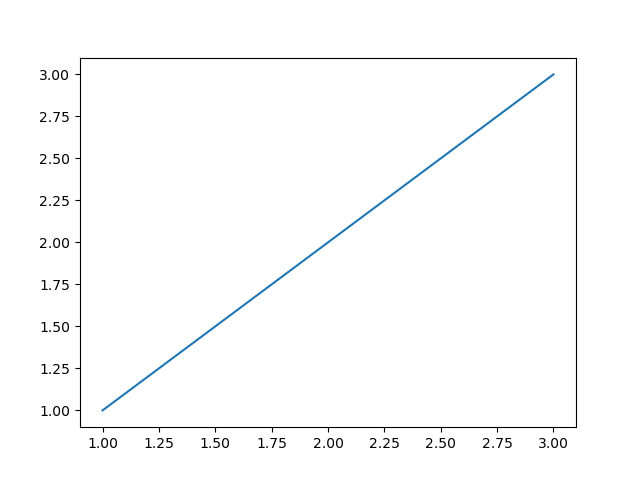

In [14]:
!pip install ipympl
%matplotlib widget
x = [1,2,3]
y = [1,2,3]
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()